In [12]:
import numpy as np

t = np.arange(-10,10,0.01)

In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [14]:
y = sigmoid(t)

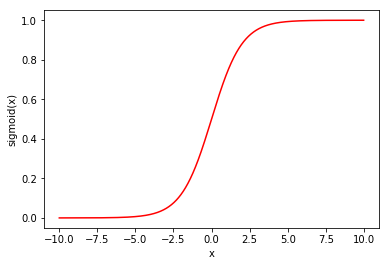

In [15]:
import matplotlib.pyplot as plt
plt.plot(t,y,color='r')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.show()

In [164]:
class LogisticRegression(object):
    """Logistic Regression Classifier, reference: Sergios ML book, Chapt.7
    Gradient Descent method"""
    def __init__(self,n_iter=50,eta=0.1,random_state=1):
        self.n_iter = n_iter
        self.eta = eta
        self.random_state = random_state
        
    def sigmoid(self,X):
        """sigmoidal functoin"""
        return np.array([ 1/(1+np.exp(np.dot(-self.w_,x))) for x in X])
    
    def add_bias(self,X):
        """add the dummy bias column"""
        return np.hstack((X,np.ones((X.shape[0],1))))
    
    def fit(self,X,y):
       # y[y==-1] = 0 
        X = self.add_bias(X) # add the bias column
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale=0.01,size=X.shape[1]) # randomize the initial weights
        self.errors=[]
        for _ in range(self.n_iter):
            s = self.sigmoid(X)
            #print('s has shape:',s.shape)
            #print('X has shape:',X.shape)
            gradient = np.dot(X.T,s-y)
            update = -self.eta*gradient
            self.w_ += update
            self.errors.append((y!=self.predict(X[:,:-1])).sum())
        return self
    def predict(self, X):
        """classify the inputs"""
        X = self.add_bias(X)
        return np.where(self.sigmoid(X) >= 0.5, 1, 0)

In [165]:
  import pandas as pd
  import matplotlib.pyplot as plt
  import numpy as np

  df=pd.read_csv('iris.data')
  df.tail()

  # extract setosa and versicolor
  y = df.iloc[0:100,4].values
  y = np.where(y =='Iris-setosa', 0,1)
  #y[60]=-y[60] # flip a sample such that its not linear separable
  # extract sepal length and petal length
  X = df.iloc[0:100,[0,2]].values


In [166]:
  X_std = np.copy(X)
  X_std[:,0] = (X[:,0]-X[:,0].mean()) /X[:,0].std()
  X_std[:,1] = (X[:,1]-X[:,1].mean()) /X[:,1].std()


In [178]:
lrc = LogisticRegression(n_iter=70,eta=0.8)

In [179]:
lrc.fit(X_std,y)
lrc.w_

array([19.78305905, 40.78997675, 13.63429703])

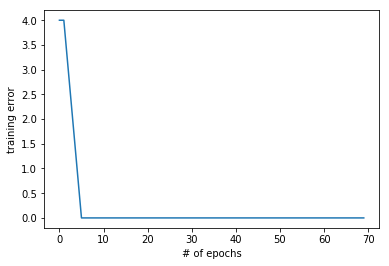

In [180]:
plt.figure
plt.plot(lrc.errors)
plt.xlabel('# of epochs')
plt.ylabel('training error')
plt.show()

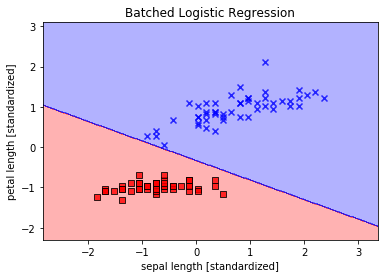

In [181]:
plt.close()
from Perceptron import plot_decision_regions
plot_decision_regions(X_std,y,classifier=lrc)
plt.title('Batched Logistic Regression')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')

plt.show()